In [1]:
pip install graphviz

Note: you may need to restart the kernel to use updated packages.


In [2]:
import os
os.environ["PATH"] += os.pathsep + 'C:\Program Files (x86)\Graphviz2.38\bin\dot.exe'

#General Libraries 
import pandas as pd
from pandas.api.types import CategoricalDtype
import matplotlib.pyplot as plt
#import plotly.graph_objects as go
import seaborn as sns
import numpy as np
import warnings
warnings.filterwarnings('ignore')
import graphviz 
from graphviz import Source
from IPython.display import SVG
import tensorflow
import keras
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten
import tensorflow as tf


#ML models
from sklearn.preprocessing import normalize
from sklearn.linear_model import LogisticRegression
from sklearn import tree
from sklearn.tree import export_text
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from keras.optimizers import Adadelta
from keras.optimizers import Adam 
from keras import regularizers
from keras.layers.core import Dropout
from keras.initializers import glorot_uniform

#metrics
from sklearn import metrics
from sklearn.metrics import f1_score,confusion_matrix, mean_squared_error, mean_absolute_error, classification_report, roc_auc_score, roc_curve, precision_score, recall_score,accuracy_score


In [3]:
#Load the data
data=pd.read_csv("default_of_credit_card_clients.csv")
#Information
data.info()
data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   ID         30000 non-null  int64
 1   LIMIT_BAL  30000 non-null  int64
 2   SEX        30000 non-null  int64
 3   EDUCATION  30000 non-null  int64
 4   MARRIAGE   30000 non-null  int64
 5   AGE        30000 non-null  int64
 6   PAY_1      30000 non-null  int64
 7   PAY_2      30000 non-null  int64
 8   PAY_3      30000 non-null  int64
 9   PAY_4      30000 non-null  int64
 10  PAY_5      30000 non-null  int64
 11  PAY_6      30000 non-null  int64
 12  BILL_AMT1  30000 non-null  int64
 13  BILL_AMT2  30000 non-null  int64
 14  BILL_AMT3  30000 non-null  int64
 15  BILL_AMT4  30000 non-null  int64
 16  BILL_AMT5  30000 non-null  int64
 17  BILL_AMT6  30000 non-null  int64
 18  PAY_AMT1   30000 non-null  int64
 19  PAY_AMT2   30000 non-null  int64
 20  PAY_AMT3   30000 non-null  int64
 21  PAY_AMT4   3

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,dpnm
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29996,220000,1,3,1,39,0,0,0,0,...,88004,31237,15980,8500,20000,5003,3047,5000,1000,0
29996,29997,150000,1,3,2,43,-1,-1,-1,-1,...,8979,5190,0,1837,3526,8998,129,0,0,0
29997,29998,30000,1,2,2,37,4,3,2,-1,...,20878,20582,19357,0,0,22000,4200,2000,3100,1
29998,29999,80000,1,3,1,41,1,-1,0,0,...,52774,11855,48944,85900,3409,1178,1926,52964,1804,1


In [4]:
#Drop "ID" column
data=data.drop(["ID"],axis=1)

In [5]:
#Check for duplicate rows.
print(f"There are {data.duplicated().sum()} duplicate rows in the data set.")

#Remove duplicate rows.
data=data.drop_duplicates()
print("The duplicate rows were removed.")

There are 35 duplicate rows in the data set.
The duplicate rows were removed.


In [6]:
#Check null values 
print(f"There are {data.isna().any().sum()} cells with null values in the dataset.")

There are 0 cells with null values in the dataset.


<AxesSubplot:>

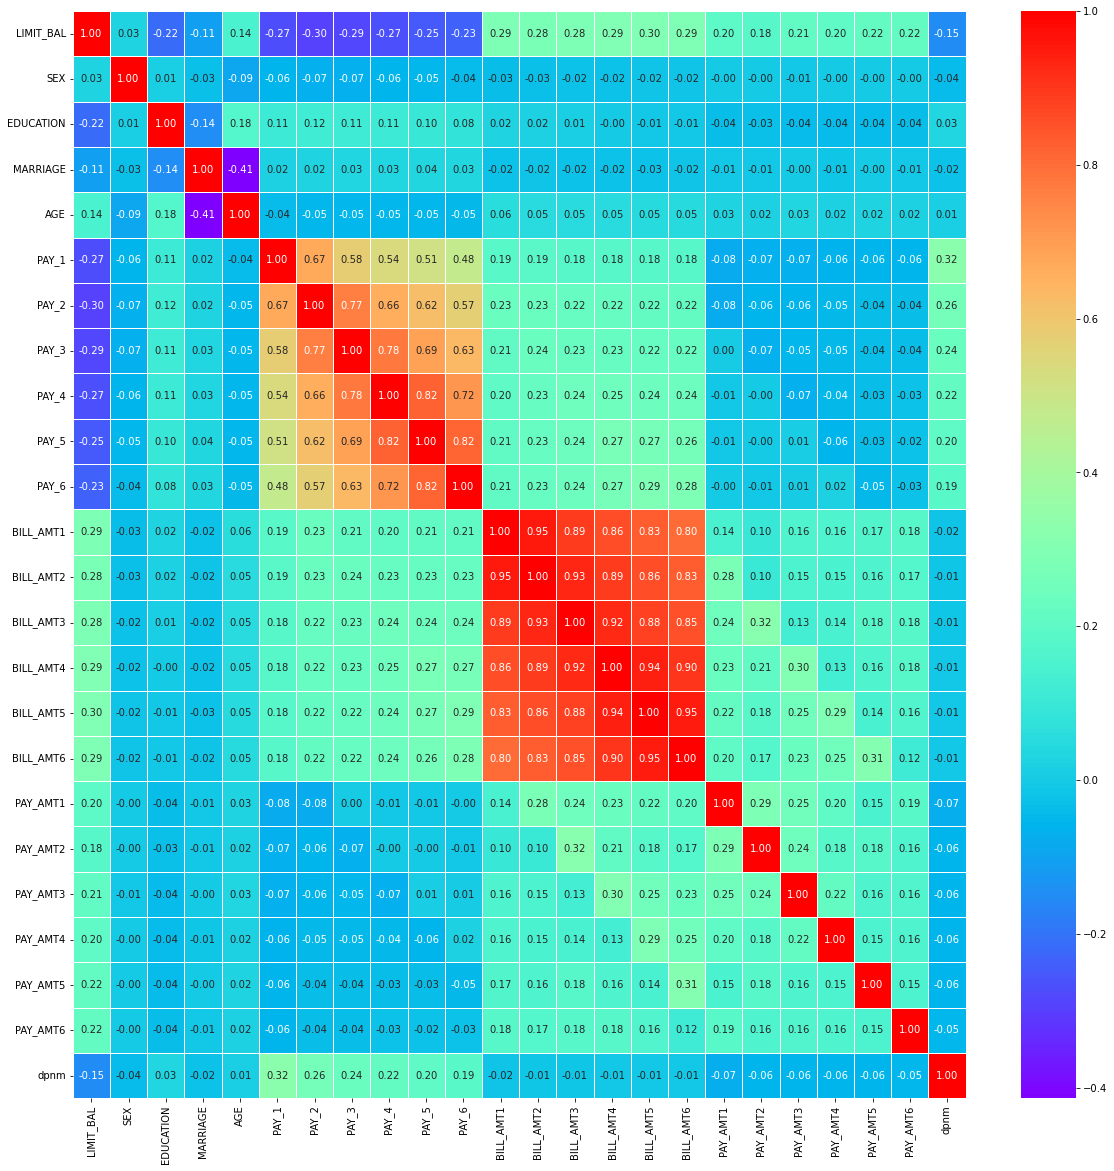

In [7]:
#Heatmap
plt.figure(figsize=(20,20))
sns.heatmap(data.corr(),annot=True,cmap="rainbow",linewidth=0.5,fmt=".2f")

# Pre-processing

In [8]:
X=data[data.columns[:-1]]
y=data["dpnm"]

In [9]:
X

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
0,20000,2,2,1,24,2,2,-1,-1,-2,...,689,0,0,0,0,689,0,0,0,0
1,120000,2,2,2,26,-1,2,0,0,0,...,2682,3272,3455,3261,0,1000,1000,1000,0,2000
2,90000,2,2,2,34,0,0,0,0,0,...,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000
3,50000,2,2,1,37,0,0,0,0,0,...,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000
4,50000,1,2,1,57,-1,0,-1,0,0,...,35835,20940,19146,19131,2000,36681,10000,9000,689,679
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,220000,1,3,1,39,0,0,0,0,0,...,208365,88004,31237,15980,8500,20000,5003,3047,5000,1000
29996,150000,1,3,2,43,-1,-1,-1,-1,0,...,3502,8979,5190,0,1837,3526,8998,129,0,0
29997,30000,1,2,2,37,4,3,2,-1,0,...,2758,20878,20582,19357,0,0,22000,4200,2000,3100
29998,80000,1,3,1,41,1,-1,0,0,0,...,76304,52774,11855,48944,85900,3409,1178,1926,52964,1804


In [10]:
y

0        1
1        1
2        0
3        0
4        0
        ..
29995    0
29996    0
29997    1
29998    1
29999    1
Name: dpnm, Length: 29965, dtype: int64

# Split to train and test 

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

 # Standartization

In [12]:
scaler=StandardScaler()
scaler.fit(X_train)
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

# Modeling

# Logistic Regression

In [13]:
logreg=LogisticRegression(multi_class="auto",random_state=25,n_jobs=-1)
#Train the estimator
logreg.fit(X_train,y_train)

LogisticRegression(n_jobs=-1, random_state=25)

In [14]:
# Make predictions.
log_pred=logreg.predict(X_test)

#CV score
logreg_cv=cross_val_score(logreg, X_train, y_train, cv=10).mean()

In [15]:
# Accuracy: 1 is perfect prediction.
print('Accuracy: %.3f' % logreg.score(X_test, y_test))

# Cross-Validation accuracy
print('Cross-validation accuracy: %0.3f' % logreg_cv)

# Precision
print('Precision: %.3f' % precision_score(y_test, log_pred))

# Recall
print('Recall: %.3f' % recall_score(y_test, log_pred))

# f1 score: best value at 1 (perfect precision and recall) and worst at 0.
print('F1 score: %.3f' % f1_score(y_test, log_pred))

Accuracy: 0.808
Cross-validation accuracy: 0.812
Precision: 0.699
Recall: 0.222
F1 score: 0.337


In [16]:
#Predict probabilities for the test data
logreg_probs=logreg.predict_proba(X_test)
#Keep probabilites of the positive class only
logreg_probs=logreg_probs[:,1]
#Compute AUC
auc_logreg=roc_auc_score(y_test,logreg_probs)
print("AUC:%.2f" %auc_logreg)

AUC:0.71


Text(0.5, 1.0, 'Confusion Matrix for Logistic Regression')

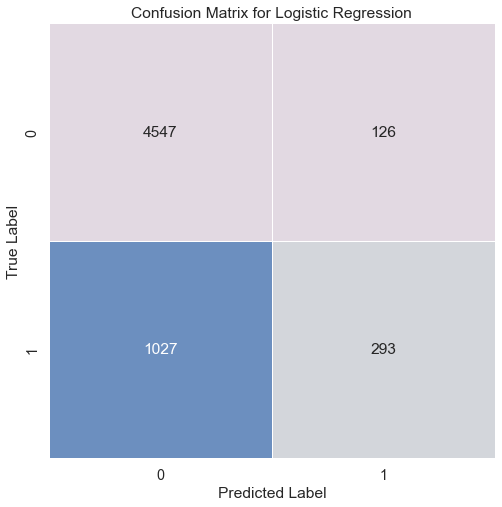

In [17]:
# Plot confusion matrix for Logistic Regression.
logreg_matrix=confusion_matrix(y_test,log_pred)
sns.set(font_scale=1.3)
plt.subplots(figsize=(8,8))
sns.heatmap(logreg_matrix,annot=True,cbar=False,cmap="twilight",linewidth=0.5,fmt="d")
plt.ylabel("True Label")
plt.xlabel("Predicted Label")
plt.title("Confusion Matrix for Logistic Regression")

# Grid search for Logistic Regression

In [18]:
#Hyperpatameters to be checked
parameters={"C":[0.0001,0.001,0.01,0.1,1,10,100,1000],"penalty":["none","12"],
           "solver":["lgfgs","sag","saga","newton-cg"]}
#Logistic regression estimator
default_logreg=LogisticRegression(multi_class="auto",random_state=25,n_jobs=-1)
# GridSearchCV estimator.
gs_logreg=GridSearchCV(default_logreg,parameters,cv=10,n_jobs=-1,verbose=1)
# Train the GridSearchCV estimator and search for the best parameters
gs_logreg.fit(X_train,y_train)

Fitting 10 folds for each of 64 candidates, totalling 640 fits


GridSearchCV(cv=10, estimator=LogisticRegression(n_jobs=-1, random_state=25),
             n_jobs=-1,
             param_grid={'C': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000],
                         'penalty': ['none', '12'],
                         'solver': ['lgfgs', 'sag', 'saga', 'newton-cg']},
             verbose=1)

In [19]:
# Make predictions with the best parameters.
gs_log_pred=gs_logreg.predict(X_test)

# Metrics for Grid search Logistic Regression

In [20]:
# Best parameters.
print("Best Logistic Regression Parameters: {}".format(gs_logreg.best_params_))

# Cross validation accuracy for the best parameters.
print('Cross-validation accuracy: %0.3f' % gs_logreg.best_score_)

# Accuracy: 1 is perfect prediction.
print('Accuracy: %0.3f' % (gs_logreg.score(X_test,y_test)))

# Precision
print('Precision: %.3f' % precision_score(y_test, gs_log_pred))

# Recall
print('Recall: %.3f' % recall_score(y_test, gs_log_pred))

# f1 score: best value at 1 (perfect precision and recall) and worst at 0.
print('F1 score: %.3f' % f1_score(y_test, gs_log_pred))

Best Logistic Regression Parameters: {'C': 0.0001, 'penalty': 'none', 'solver': 'saga'}
Cross-validation accuracy: 0.812
Accuracy: 0.807
Precision: 0.699
Recall: 0.221
F1 score: 0.336


Text(0.5, 1.0, 'Confusion Matrix for GridSearchCV Logistic Regression')

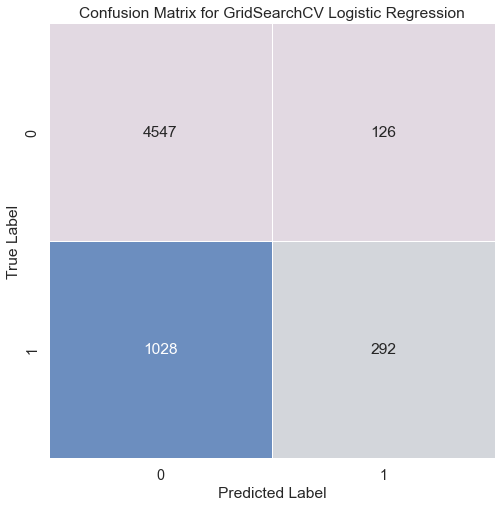

In [21]:
# Print confusion matrix for Logistic regression.
gs_logreg_matrix=confusion_matrix(y_test,gs_log_pred)
sns.set(font_scale=1.3)
plt.subplots(figsize=(8,8))
sns.heatmap(gs_logreg_matrix,annot=True,cbar=False,cmap="twilight",linewidth=0.5,fmt="d")
plt.ylabel("True Label")
plt.xlabel("Predicted Label")
plt.title("Confusion Matrix for GridSearchCV Logistic Regression")

In [22]:
#Predict probabilites for the test data.
gs_logreg_probs=gs_logreg.predict_proba(X_test)
#Keep probabilites of the positive class only
gs_logreg_probs=gs_logreg_probs[:,1]
#Compute AUC
gs_logreg_auc=roc_auc_score(y_test,gs_logreg_probs)
print("AUC:%.2f"%gs_logreg_auc)

AUC:0.71


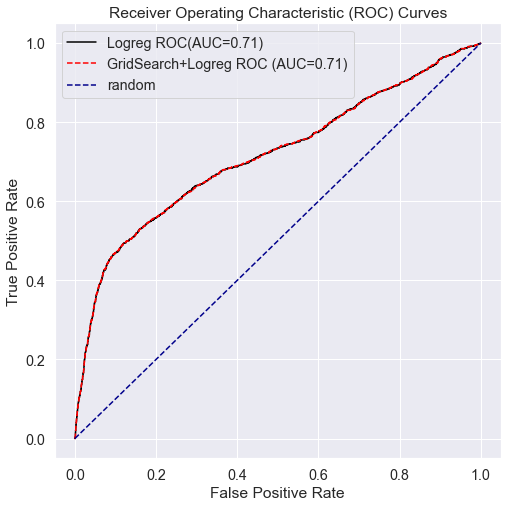

In [23]:
# Get the ROC curves.
logreg_fpr,logreg_tpr,logreg_thresholds=roc_curve(y_test,logreg_probs)
gs_logreg_fpr,gs_logreg_tpr,gs_logreg_thresholds=roc_curve(y_test,gs_logreg_probs)
#Plot ROC curves
plt.figure(figsize=(8,8))
plt.plot(logreg_fpr,logreg_tpr,color="black",label="Logreg ROC(AUC=%0.2f)"%auc_logreg)
plt.plot(gs_logreg_fpr,gs_logreg_tpr,color="red",linestyle="--",label="GridSearch+Logreg ROC (AUC=%0.2f)"%gs_logreg_auc)
plt.plot([0,1],[0,1],color="darkblue",linestyle="--",label="random")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic (ROC) Curves")
plt.legend()
plt.show()

# Decision Tree

In [24]:
#Initialize Decision Tree
tr=tree.DecisionTreeClassifier(max_depth=3,criterion="gini",random_state=25)
#train
tr.fit(X_train,y_train)


DecisionTreeClassifier(max_depth=3, random_state=25)

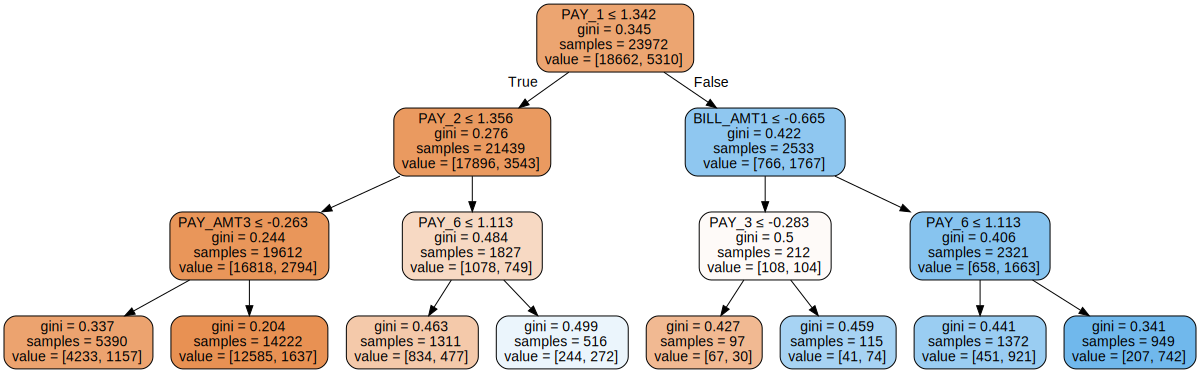

In [25]:
#Plot tree
graph_data=tree.export_graphviz(tr,out_file=None,feature_names=X.columns,filled=True,rounded=True,special_characters=True)
graph=graphviz.Source(graph_data)
graph

Text(0.5, 1.0, 'Decision Tree')

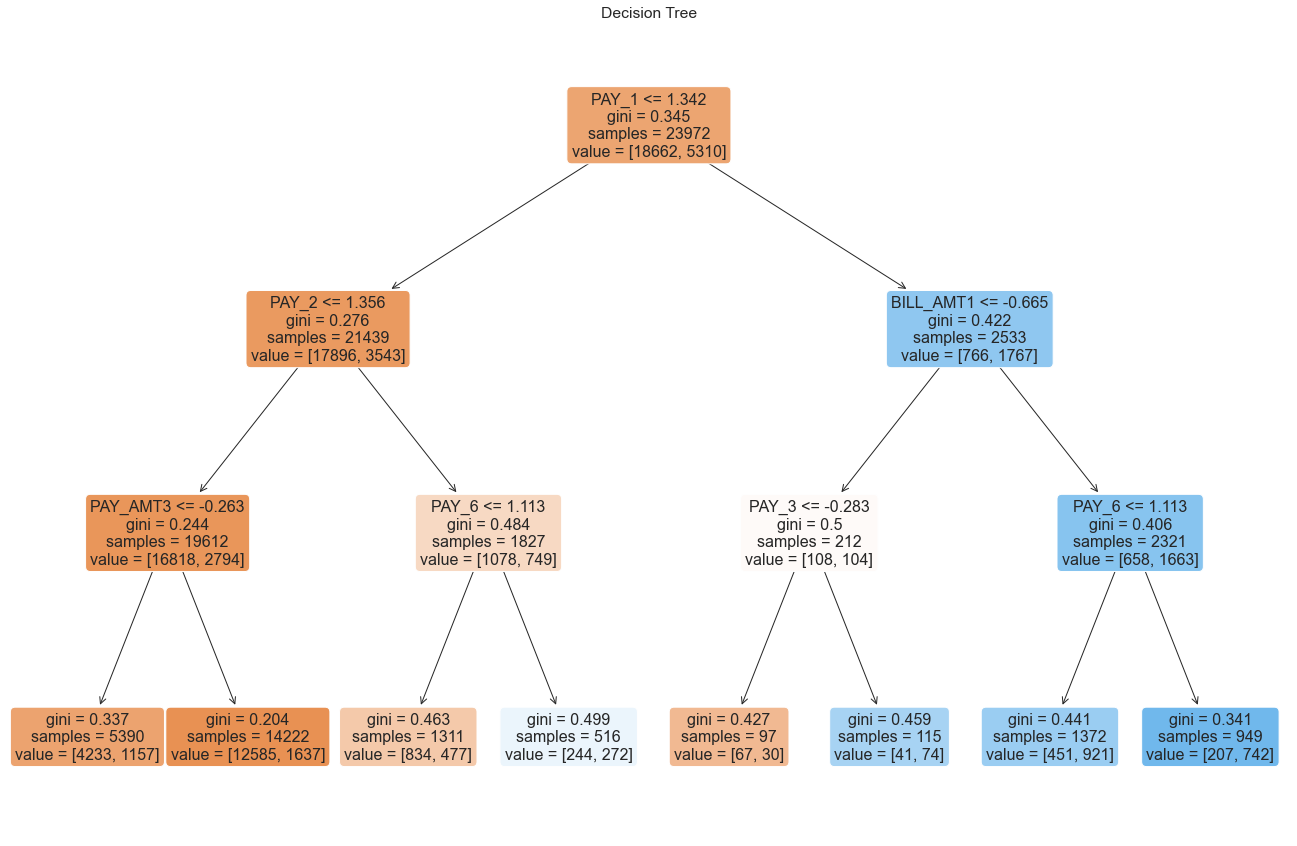

In [26]:
fig=plt.figure(figsize=(23,15))
tree.plot_tree(tr.fit(X_train,y_train),feature_names=X.columns,filled=True,rounded=True,fontsize=16)
plt.title("Decision Tree")

In [27]:
tr_pred=tr.predict(X_test)
tr_cv=cross_val_score(tr,X_train,y_train,cv=10).mean()

In [28]:
# Accuracy: 1 is perfect prediction.
print("Accuracy:%.3f"%tr.score(X_test,y_test))
# Cross-Validation accuracy
print("Cross-validation accuracy:%.3f"%tr_cv)
# Precision
print("Precision:%.3f"%precision_score(y_test,tr_pred))
# Recall
print("Precision:%.3f"%recall_score(y_test,tr_pred))
# f1 score: best value at 1 (perfect precision and recall) and worst at 0.
print("F1 score:%.3f"%f1_score(y_test,tr_pred))

Accuracy:0.818
Cross-validation accuracy:0.822
Precision:0.662
Precision:0.352
F1 score:0.459


Text(0.5, 1.0, 'Confusion Matrix for Decision Tree')

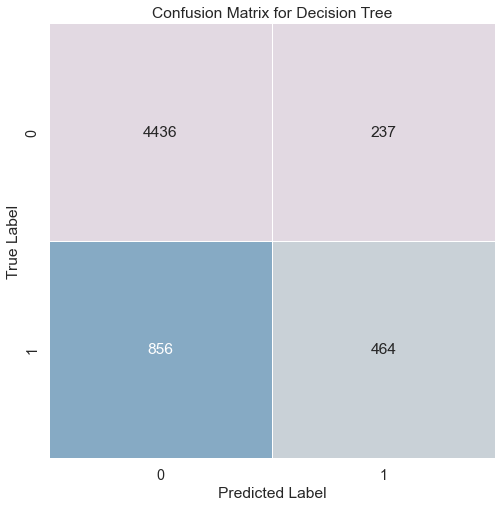

In [29]:
#Plot confusion matrix Decision Tree
tr_matrix=confusion_matrix(y_test,tr_pred)
sns.set(font_scale=1.3)
plt.subplots(figsize=(8,8))
sns.heatmap(tr_matrix,annot=True,cbar=False,cmap="twilight",linewidth=0.5,fmt="d")
plt.ylabel("True Label")
plt.xlabel("Predicted Label")
plt.title("Confusion Matrix for Decision Tree")

In [30]:
#Predict probabilities for test data
tr_probs=tr.predict_proba(X_test)
tr_probs=tr_probs[:,1]
#Compute AUC
auc_tr=roc_auc_score(y_test,tr_probs)
print("AUC:%.3f"%auc_tr)

AUC:0.731


# Grid Search for DT

In [31]:
parameters={"criterion":["gini","entropy"],"max_depth":[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]}
#MLP estimator
default_tr=tree.DecisionTreeClassifier(random_state=25)
#GridSearch
gs_tree=GridSearchCV(default_tr,parameters,cv=10,n_jobs=-1,verbose=1)
#Train GridSearchCV
gs_tree.fit(X_train,y_train)

Fitting 10 folds for each of 40 candidates, totalling 400 fits


GridSearchCV(cv=10, estimator=DecisionTreeClassifier(random_state=25),
             n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                       13, 14, 15, 16, 17, 18, 19, 20]},
             verbose=1)

In [32]:
#Make predictions
gs_tree_pred=gs_tree.predict(X_test)

# Metrics for Grid Search Decision tree

In [33]:
#Best parameters 
print("Best Decision Tree Parameters:{}".format(gs_tree.best_params_))
#Cross validation accuracy
print("Cross validation accuracy:%.3f"%gs_tree.best_score_)
#Accuracy
print("Accuracy:%.3f"%gs_tree.score(X_test,y_test))
#Precision 
print("Precision:%.3f"%precision_score(y_test,gs_tree_pred))
#Recall
print("Recall:%.3f"%recall_score(y_test,gs_tree_pred))
#f1 score
print("F1 score:%.3f"%f1_score(y_test,gs_tree_pred))

Best Decision Tree Parameters:{'criterion': 'gini', 'max_depth': 3}
Cross validation accuracy:0.822
Accuracy:0.818
Precision:0.662
Recall:0.352
F1 score:0.459


Text(0.5, 1.0, 'Confusion Matrix for GridSearchCV Decision Tree')

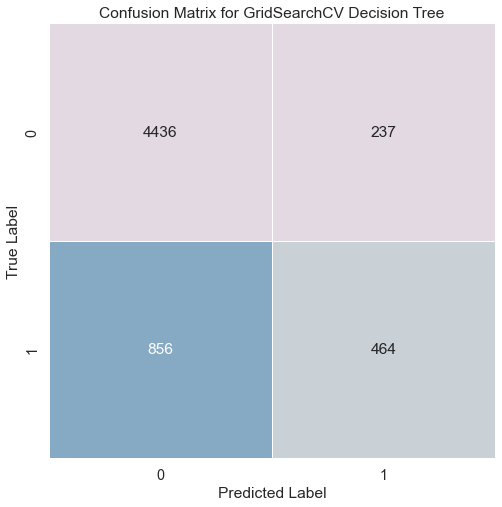

In [34]:
#Plot confusion matrix
gs_tr_matrix=confusion_matrix(y_test,gs_tree_pred)
sns.set(font_scale=1.3)
plt.subplots(figsize=(8,8))
sns.heatmap(gs_tr_matrix,annot=True,cbar=False,cmap="twilight",linewidth=0.5,fmt="d")
plt.ylabel("True Label")
plt.xlabel("Predicted Label")
plt.title("Confusion Matrix for GridSearchCV Decision Tree")

In [35]:
#Predict probabilities
gs_tree_probs=gs_tree.predict_proba(X_test)
#keep probab positive 
gs_tree_probs=gs_tree_probs[:,1]
#Compute AUC
gs_tree_auc=roc_auc_score(y_test,gs_tree_probs)
print("AUC:%.3f"%gs_tree_auc)

AUC:0.731


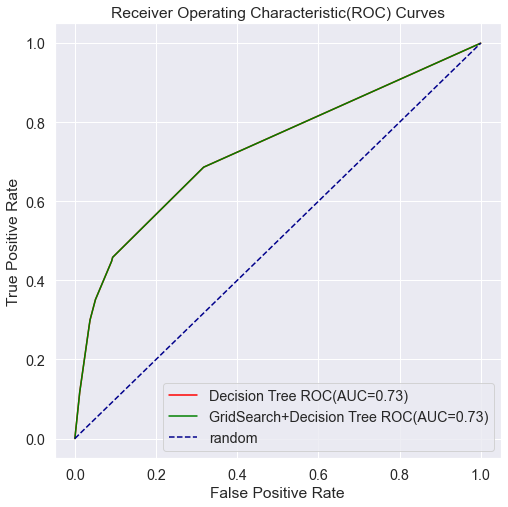

In [36]:
#Get ROC curves
gs_tr_fpr,gs_tr_tpr,gs_tr_thresholds=roc_curve(y_test,gs_tree_probs)
tr_fpr,tr_tpr,tr_thresholds=roc_curve(y_test,tr_probs)

#Plot ROC curve
plt.figure(figsize=(8,8))
plt.plot(tr_fpr,tr_tpr,color="red",label="Decision Tree ROC(AUC=%.2f)"%auc_tr)
plt.plot(gs_tr_fpr,gs_tr_tpr,color="green",label="GridSearch+Decision Tree ROC(AUC=%.2f)"%gs_tree_auc)
plt.plot([0,1],[0,1],color="darkblue",linestyle="--",label="random")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic(ROC) Curves")
plt.legend()
plt.show()

# Neural Network

In [37]:
hl   = 5                    # number of hidden layer
nohl = [50,40,30,20,10]     # number of neurons in each hidden layer

classifier = Sequential()

# Hidden Layer
for i in range(hl):
    if i==0:
        classifier.add(Dense(units=nohl[i], input_dim=X_train.shape[1], kernel_initializer='uniform', activation='relu'))
    else :
        classifier.add(Dense(units=nohl[i], kernel_initializer=glorot_uniform(seed=0), activation='relu'))

# Output Layer
classifier.add(Dense(units=1, kernel_initializer=glorot_uniform(seed=0), activation='sigmoid'))

classifier.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [38]:
classifier.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 50)                1200      
                                                                 
 dense_1 (Dense)             (None, 40)                2040      
                                                                 
 dense_2 (Dense)             (None, 30)                1230      
                                                                 
 dense_3 (Dense)             (None, 20)                620       
                                                                 
 dense_4 (Dense)             (None, 10)                210       
                                                                 
 dense_5 (Dense)             (None, 1)                 11        
                                                                 
Total params: 5,311
Trainable params: 5,311
Non-trainabl

In [39]:
classifier.fit(X_train, y_train, epochs=100, batch_size=512)

Epoch 1/100
47/47 [==============================] - 1s 2ms/step - loss: 0.5291 - accuracy: 0.7785
Epoch 2/100
47/47 [==============================] - 0s 3ms/step - loss: 0.4609 - accuracy: 0.7785
Epoch 3/100
47/47 [==============================] - 0s 2ms/step - loss: 0.4516 - accuracy: 0.7785
Epoch 4/100
47/47 [==============================] - 0s 3ms/step - loss: 0.4461 - accuracy: 0.7898
Epoch 5/100
47/47 [==============================] - 0s 3ms/step - loss: 0.4414 - accuracy: 0.8177
Epoch 6/100
47/47 [==============================] - 0s 2ms/step - loss: 0.4374 - accuracy: 0.8191
Epoch 7/100
47/47 [==============================] - 0s 2ms/step - loss: 0.4334 - accuracy: 0.8194
Epoch 8/100
47/47 [==============================] - 0s 2ms/step - loss: 0.4281 - accuracy: 0.8211
Epoch 9/100
47/47 [==============================] - 0s 3ms/step - loss: 0.4257 - accuracy: 0.8215
Epoch 10/100
47/47 [==============================] - 0s 2ms/step - loss: 0.4257 - accuracy: 0.8206
Epoch 11/

47/47 [==============================] - 0s 2ms/step - loss: 0.3720 - accuracy: 0.8394
Epoch 84/100
47/47 [==============================] - 0s 2ms/step - loss: 0.3743 - accuracy: 0.8386
Epoch 85/100
47/47 [==============================] - 0s 2ms/step - loss: 0.3741 - accuracy: 0.8365
Epoch 86/100
47/47 [==============================] - 0s 3ms/step - loss: 0.3718 - accuracy: 0.8384
Epoch 87/100
47/47 [==============================] - 0s 2ms/step - loss: 0.3717 - accuracy: 0.8412
Epoch 88/100
47/47 [==============================] - 0s 2ms/step - loss: 0.3709 - accuracy: 0.8404
Epoch 89/100
47/47 [==============================] - 0s 2ms/step - loss: 0.3707 - accuracy: 0.8402
Epoch 90/100
47/47 [==============================] - 0s 3ms/step - loss: 0.3707 - accuracy: 0.8400
Epoch 91/100
47/47 [==============================] - 0s 3ms/step - loss: 0.3678 - accuracy: 0.8402
Epoch 92/100
47/47 [==============================] - 0s 2ms/step - loss: 0.3695 - accuracy: 0.8397
Epoch 93/100


In [40]:
y_pred = classifier.predict(X_test)
y_pred = (y_pred > 0.5)
conf_matr = confusion_matrix(y_test, y_pred)

TP = conf_matr[0,0]; FP = conf_matr[0,1]; TN = conf_matr[1,1]; FN = conf_matr[1,0]
print('Confusion Matrix : ')
print(conf_matr)
print()
print('True Positive (TP)  : ',TP)
print('False Positive (FP) : ',FP)
print('True Negative (TN)  : ',TN)
print('False Negative (FN) : ',FN)

188/188 [==============================] - 0s 997us/step
Confusion Matrix : 
[[4325  348]
 [ 819  501]]

True Positive (TP)  :  4325
False Positive (FP) :  348
True Negative (TN)  :  501
False Negative (FN) :  819


In [41]:
acc = (TP+TN)/(TP+TN+FP+FN)
print('By this metric, only '+ str(round(acc*100)) + '% of them are correctly predicted.')

By this metric, only 81% of them are correctly predicted.


In [42]:
pre = TP/(TP+FP)
print('From those classification result, by calculating the precision, there are '+ str(round(pre*100)) + '% of them who are actually pay the credit.')

From those classification result, by calculating the precision, there are 93% of them who are actually pay the credit.
